<a href="https://colab.research.google.com/github/Jessyka/depp-neural-network-classifier/blob/master/classificacao_roupas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5303 - accuracy: 0.8120 - val_loss: 0.4022 - val_accuracy: 0.8591
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3975 - accuracy: 0.8556 - val_loss: 0.3744 - val_accuracy: 0.8636
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3653 - accuracy: 0.8663 - val_loss: 0.3473 - val_accuracy: 0.8732
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3383 - accuracy: 0.8743 - val_loss: 0.3570 - val_accuracy: 0.8702
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3254 - accuracy: 0.8797 - val_loss: 0.3330 - val_accuracy: 0.8808
resultado teste: 2
número da imagem de teste: 2
313/313 [==============================] - 0s 1ms/step - loss: 55.2439 - accuracy: 0.8609
Perda do teste: 55.2439079284668
Acurácia do teste: 0.8608999848365784


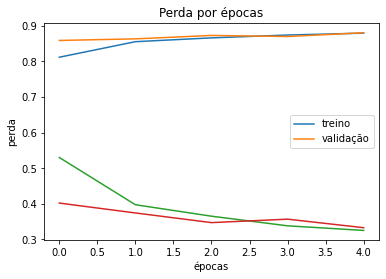

In [10]:
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model

datasets = keras.datasets.fashion_mnist
((imagens_treino, identificacoes_treino), (test_data, test_identification)) = datasets.load_data()


# training_data.shape
# test_data.shape


#plt.imshow(training_data[0])
#plt.title(training_identification[0])

total_de_classificacoes = 10
nomes_de_classificacoes = ['Camiseta', 'Calça', 'Pullover', 
                           'Vestido', 'Casaco', 'Sandália', 'Camisa',
                           'Tênis', 'Bolsa', 'Bota']
'''
plt.imshow(imagens_treino[0])
plt.title(identificacoes_treino[0])

for imagem in range(10):
  plt.subplot(2, 5, imagem+1)
  plt.imshow(imagens_treino[imagem])
  plt.title(nomes_de_classificacoes[identificacoes_treino[imagem]])
'''  
#plt.imshow(imagens_treino[0])
#plt.colorbar()

imagens_treino = imagens_treino/float(255)


modelo = keras.Sequential([ 
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation=tensorflow.nn.relu),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation=tensorflow.nn.softmax)
])

modelo.compile(optimizer='adam', 
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2)

# modelo.save('modelo.h5')
# modelo_salvo = load_model('modelo.h5')


plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'validação'])

plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('épocas')
plt.ylabel('perda')
plt.legend(['treino', 'validação'])

testes = modelo.predict(test_data)
print('resultado teste:', np.argmax(testes[1]))
print('número da imagem de teste:', test_identification[1])

# testes_modelo_salvo = modelo_salvo.predict(imagens_teste)
# print('resultado teste modelo salvo:', np.argmax(testes_modelo_salvo[1]))
# print('número da imagem de teste:', test_identification[1])

perda_teste, acuracia_teste = modelo.evaluate(test_data, test_identification)
print('Perda do teste:', perda_teste)
print('Acurácia do teste:', acuracia_teste)




